In [40]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [41]:
data1 = pd.read_csv('./Sonidos de casa/data_momento_aux.csv')
data2 = pd.read_csv('./Sonidos de casa/data_momento_aux_shaver.csv')
data3 = pd.read_csv('./Sonidos de casa/data_momento_aux_hairdryer.csv')
data4 = pd.read_csv('./Sonidos de casa/data_momento_aux_airconditioner.csv')
data5 = pd.read_csv('./Sonidos de casa/data_momento_aux_cellphone.csv')
data6 = pd.read_csv('./Sonidos de casa/data_momento_aux_comp_type.csv')
data7 = pd.read_csv('./Sonidos de casa/data_momento_aux_shower.csv')
data8 = pd.read_csv('./Sonidos de casa/data_momento_aux_vacuum_silence_dryer.csv')
data9 = pd.read_csv('./Sonidos de casa/data_momento_aux_blender_doorbell.csv')
data10 = pd.read_csv('./Sonidos de casa/data_momento_aux_alarm_faucet_microwave.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

# KNeighborsClassifier

In [32]:
y = pd.get_dummies(data=data.momento_aux)
X = data.loc[:, data.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [33]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99328859 0.95945946 0.95945946 1.         1.         0.95945946
 0.99324324 0.25675676 0.68243243 0.93243243 1.         0.93918919
 0.95945946 0.9527027  0.91216216 0.93243243 0.97297297 0.97972973
 0.95945946 0.97972973]
Accuracy: 0.92 (+/- 0.33)


In [34]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9662731871838112

In [35]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9662731871838112

In [36]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9691131713322538

In [37]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.970588,1.000000,0.985075
Ducha,0.972222,1.000000,0.985915
Lavadora,1.000000,1.000000,1.000000
Aspiradora,0.875000,1.000000,0.933333
Afeitadora,1.000000,1.000000,1.000000
Secador_pelo,0.944444,1.000000,0.971429
Aire_acondicionado,0.945946,0.945946,0.945946
Telefono,0.981132,0.945455,0.962963
Tecleo,1.000000,0.829787,0.906977


Confusion matrix, without normalization
[[33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 35  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 52  0  1  0  2  0  0  0  0]
 [ 1  0  0  5  0  0  0  0 39  0  0  0  0  1  1  0]
 [ 0  1  0  0  0  0  0  0  0 34  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1]
 [ 0  0  0  0  0  1  0  1  0  0  0  0  0  0  0 26]]


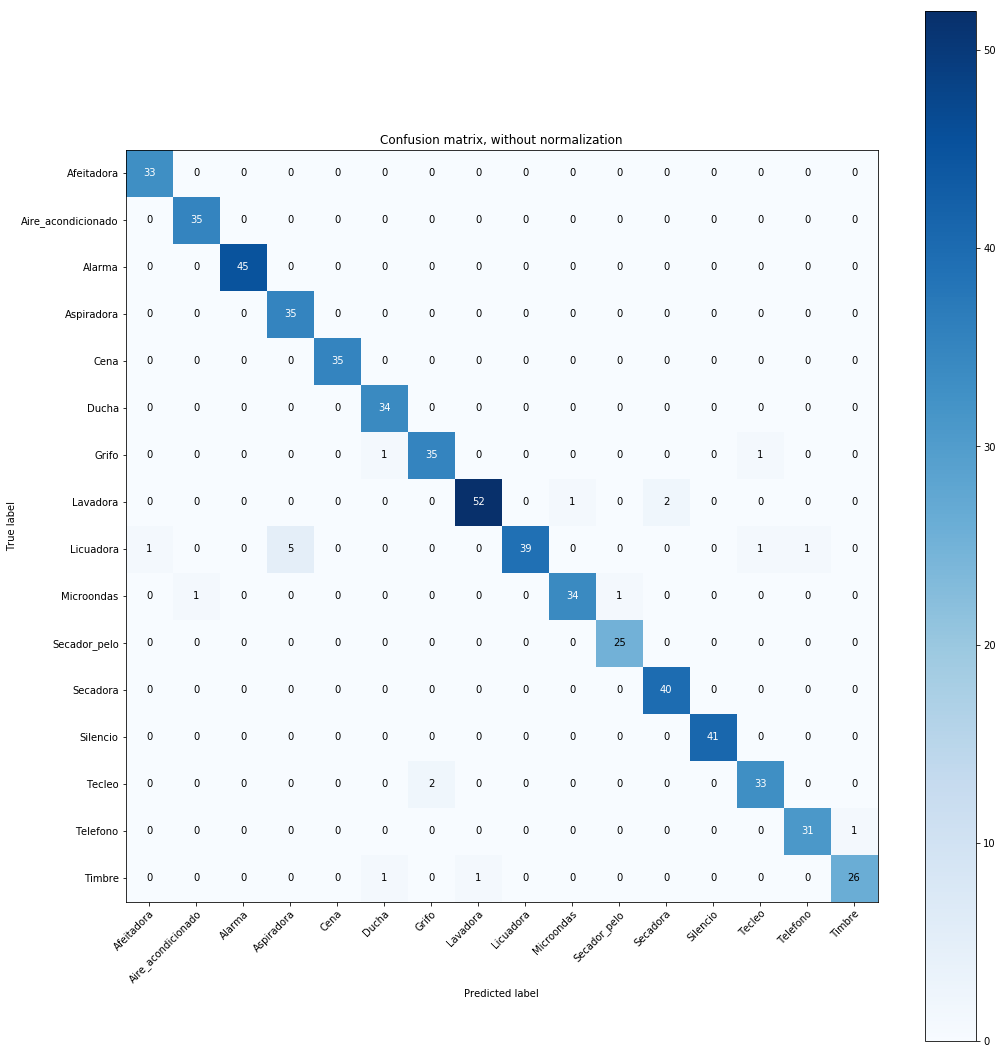

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [40]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [43]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [48]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [49]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [50]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [51]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

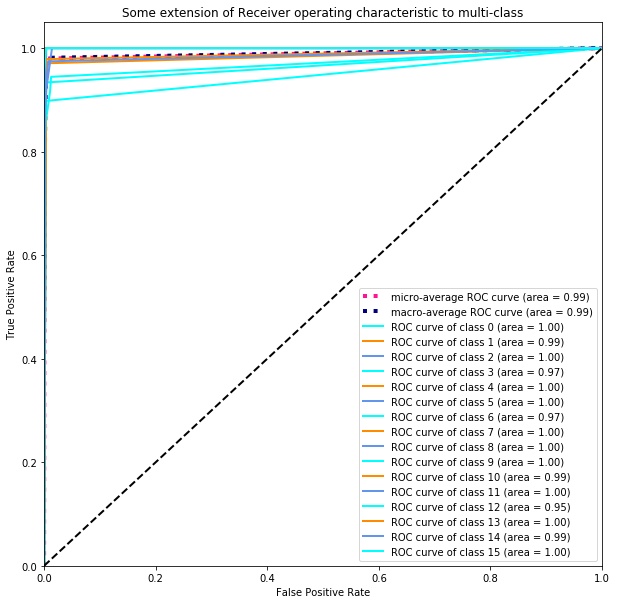

In [52]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# SVC

In [42]:
y = pd.get_dummies(data=data.momento_aux)
X = data.loc[:, data.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [43]:
clf = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma = 'scale', probability=True))

In [44]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.12984822934232715

In [45]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.1905564924114671

In [46]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.17406674208144796

In [47]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
momento_aux,,,
Cena,0.070727,1.000000,0.132110
Ducha,0.916667,0.323529,0.478261
Lavadora,0.000000,0.000000,0.000000
Aspiradora,0.000000,0.000000,0.000000
Afeitadora,0.000000,0.000000,0.000000
Secador_pelo,0.750000,0.461538,0.571429
Aire_acondicionado,0.000000,0.000000,0.000000
Telefono,0.000000,0.000000,0.000000
Tecleo,0.000000,0.000000,0.000000


Confusion matrix, without normalization
[[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 48  0  0  0]
 [43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


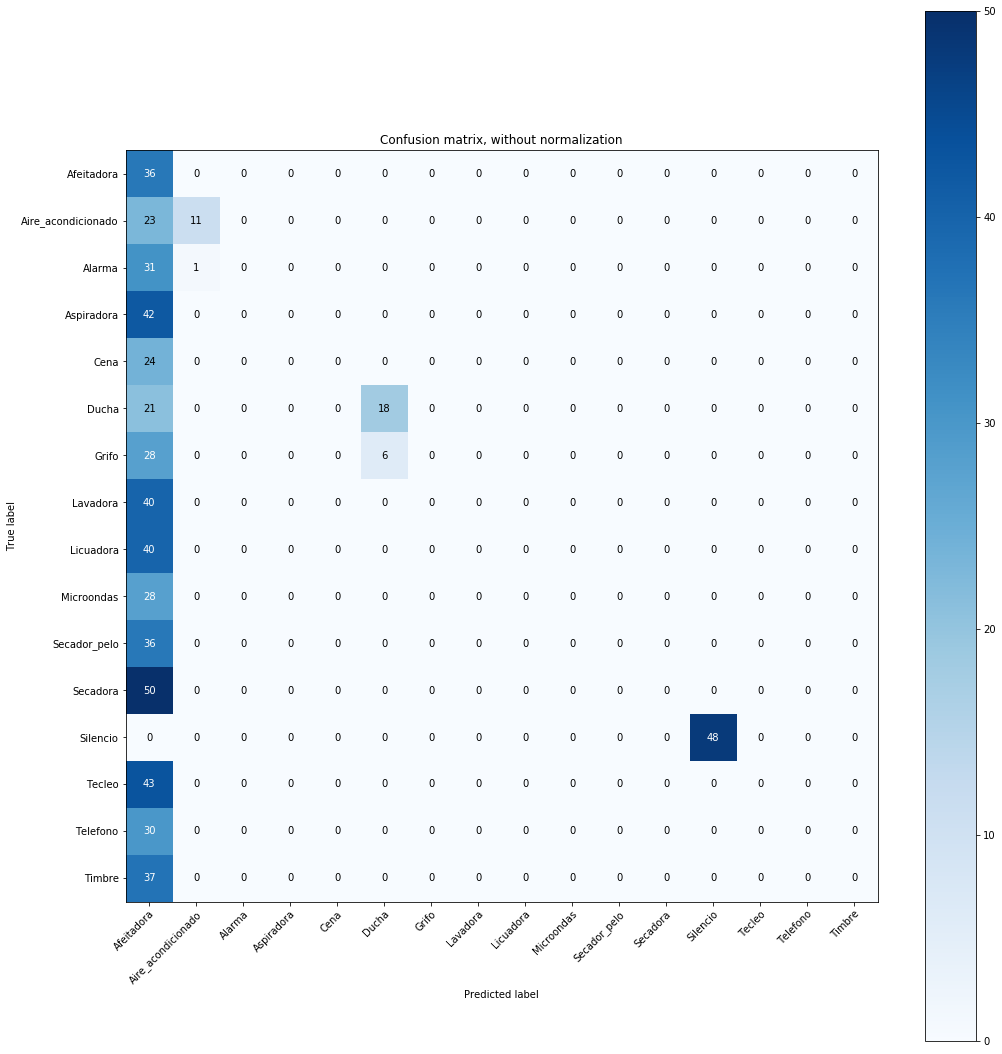

In [48]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [49]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [51]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma = 'scale', probability=True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [52]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [53]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [54]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [55]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [56]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

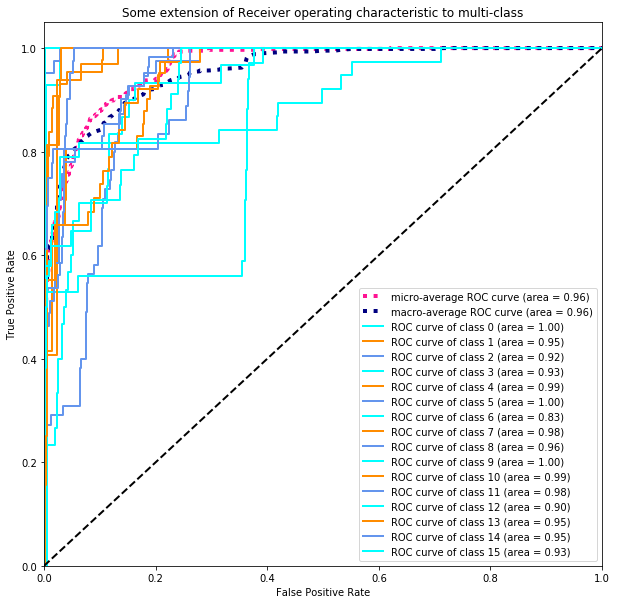

In [57]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# LinearRegression

In [59]:
y = pd.get_dummies(data=data.momento_aux)
X = data.loc[:, data.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [62]:
clf = OneVsRestClassifier(linear_model.LinearRegression())
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00675676
 0.         0.06081081 0.04054054 0.14864865 0.02702703 0.
 0.         0.        ]
Accuracy: 0.01 (+/- 0.07)


In [63]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.13827993254637436

# LogisticRegression

In [64]:
y = pd.get_dummies(data=data.momento_aux)
X = data.loc[:, data.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [66]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-package

0.4536256323777403